# Predicting Of Survival Of People In Titanic

## Data:-
>* The data has been split into two groups:
training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.
>*The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

>* Variable Notes
>>* pclass: A proxy for socio-economic status (SES)
>>>* 1st = Upper
>>>* 2nd = Middle
>>>* 3rd = Lower
>>* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
>>* sibsp: The dataset defines family relations in this way...
>>* Sibling = brother, sister, stepbrother, stepsister
>>>* Spouse = husband, wife (mistresses and fiancés were ignored)
>>* parch: The dataset defines family relations in this way...
>>* Parent = mother, father
>>* Child = daughter, son, stepdaughter, stepson
>>* Some children travelled only with a nanny, therefore parch=0 for them.

Import required tools

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
## Import data
train_df = pd.read_csv('D:\Machine_learning/MACHINE_LEARN/PROJECTS/Titanic/Data/train.csv')
test_df = pd.read_csv('D:\Machine_learning/MACHINE_LEARN/PROJECTS/Titanic/Data/test.csv')

## EDA(Exploratory Data Analysis) 

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
# check for null value
train_df.isna().sum()/len(train_df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

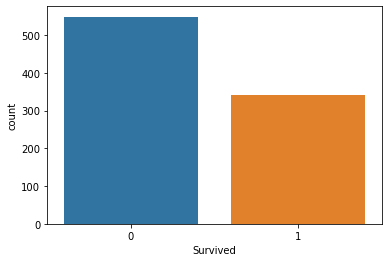

In [8]:
# plot counts of survied and not survied
sns.countplot(x=train_df.Survived)

In [9]:
len(train_df.PassengerId.unique())

891

its same as no. of rows so not much important in prediction

In [10]:
train_df.Sex.unique()

array(['male', 'female'], dtype=object)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
len(train_df.Ticket.unique())

681

In [13]:
len(train_df.Name.unique())

891

its name so it should not be that important in prediction 

In [14]:
nan_features = [feature for feature in train_df if train_df[feature].isnull().sum() >1]
nan_features

['Age', 'Cabin', 'Embarked']

### numeric features

In [15]:
numeric_features=[]
for lable, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
       numeric_features.append(lable)
numeric_features    

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [16]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
for lable, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(lable)

Age


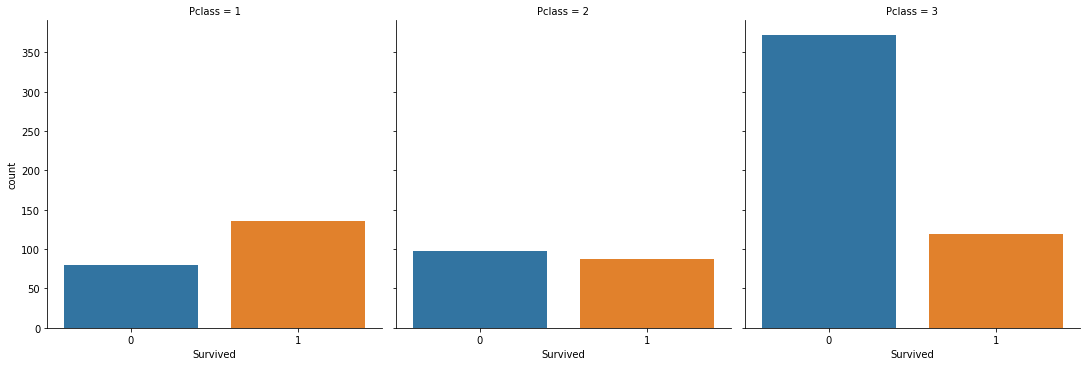

In [18]:
sns.catplot(x='Survived', col='Pclass' , kind='count', data=train_df)

**NOTE**- Here passengers with pclass-3 less likely to survive

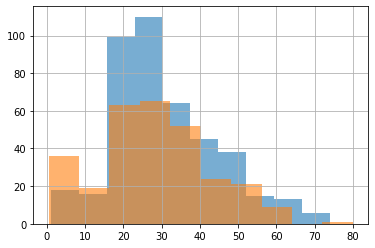

In [19]:
train_df.groupby('Survived').Age.hist(alpha=0.6);

### Categorical features

In [20]:
categorical_features=[]
for lable, content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        categorical_features.append(lable)
        
categorical_features        

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

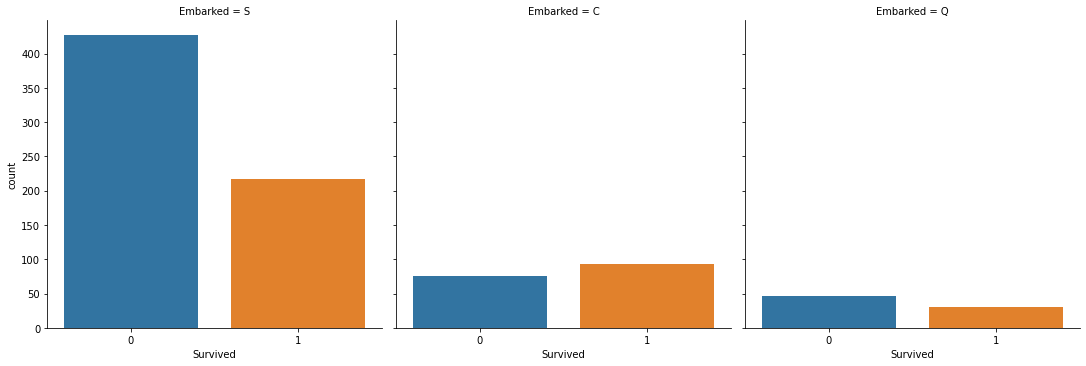

In [21]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=train_df);

**NOTE**- passengerrs who embarked in  Southampton were less likely to survive.

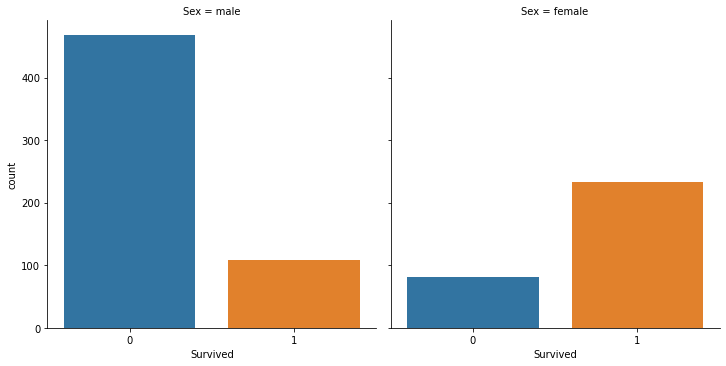

In [22]:
sns.catplot(x='Survived', col= 'Sex', kind='count', data=train_df)

**NOTE**- looks like women are more likely will survive

### Lets see pairplot

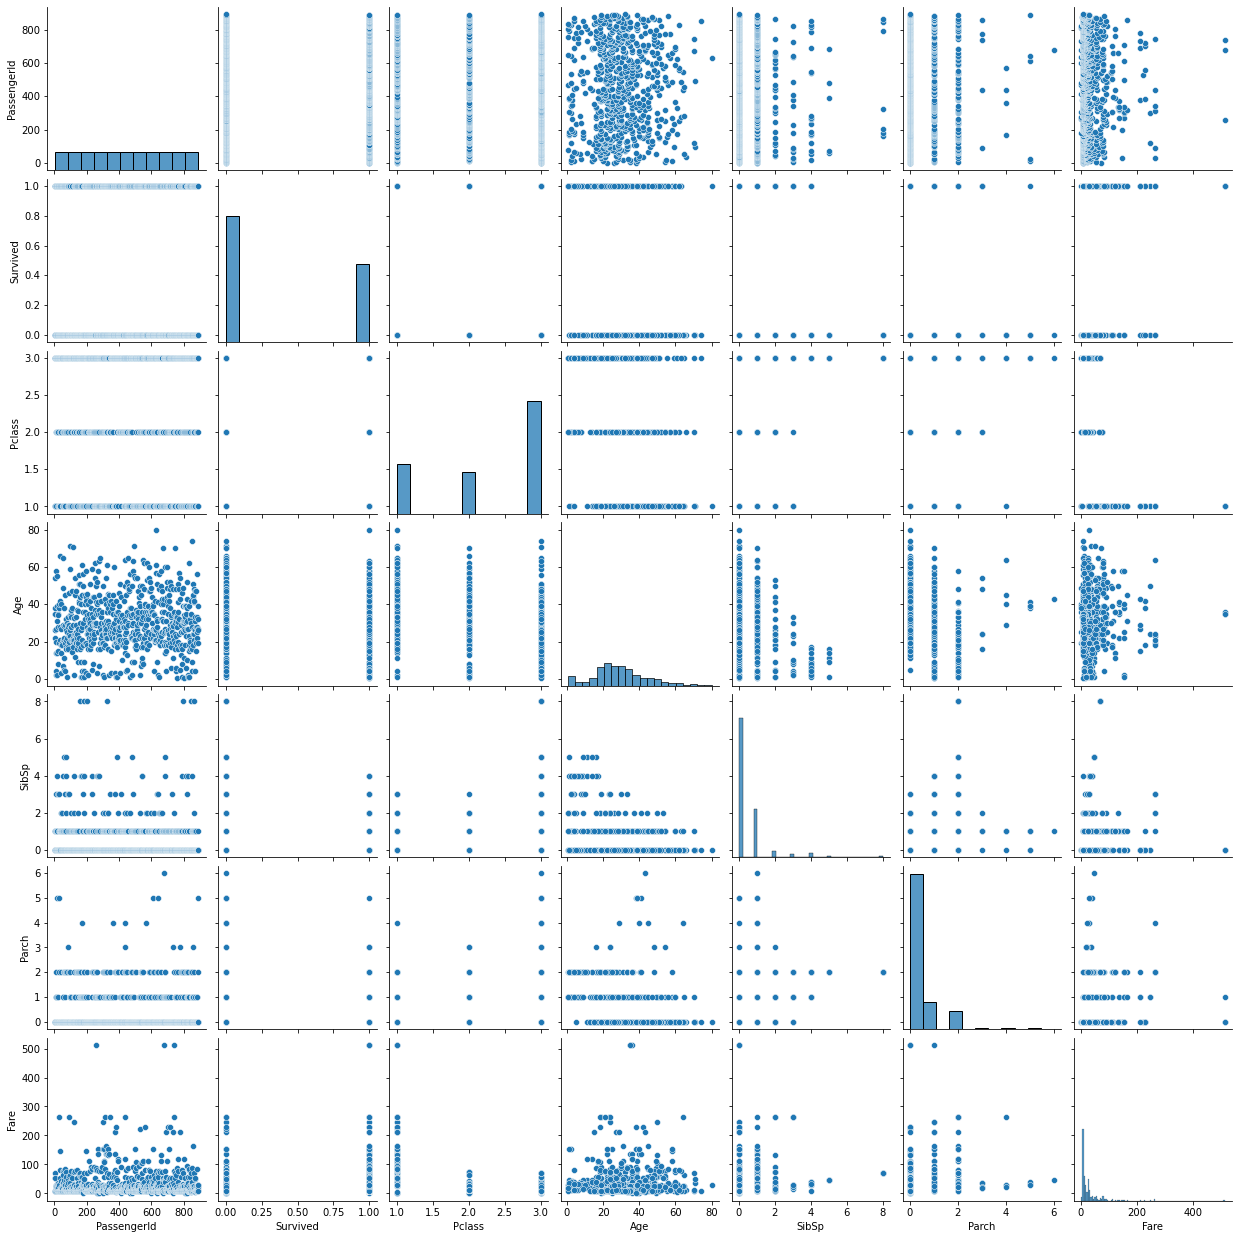

In [23]:
sns.pairplot(train_df)

## Feature Engineering
>* from eda we see that some columns are not that important for prediction of survivals ex. passangersId, Name
>* some might be important like age, sex

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Make copy of df to do processing
train_df_tmp = train_df.copy()

In [26]:
train_df_tmp.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
train_df_tmp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [27]:
train_df_tmp.isna().sum()/len(train_df)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [28]:
train_df_tmp.Age.median()

28.0

### handle numeric missing

In [29]:
for lable , content in train_df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add a binary column which tells if the data was missing our not
            train_df_tmp[lable+'_missing'] = pd.isnull(content)
            # add median for missing values
            train_df_tmp[lable] = content.fillna(content.median())
            
    

In [30]:
train_df_tmp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_missing
0,0,3,male,22.0,1,0,7.2500,NaN,S,False
1,1,1,female,38.0,1,0,71.2833,C85,C,False
2,1,3,female,26.0,0,0,7.9250,NaN,S,False
3,1,1,female,35.0,1,0,53.1000,C123,S,False
4,0,3,male,35.0,0,0,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,False
887,1,1,female,19.0,0,0,30.0000,B42,S,False
888,0,3,female,28.0,1,2,23.4500,NaN,S,True
889,1,1,male,26.0,0,0,30.0000,C148,C,False


In [31]:
# df.groupby(['Survived'])['cabin_null'].mean()
train_df_tmp.groupby(['Survived'])['Age_missing'].mean()

Survived
0    0.227687
1    0.152047
Name: Age_missing, dtype: float64

In [32]:
print(train_df.Age.std())
print(train_df_tmp.Age.std())

14.526497332334042
13.019696550973201


**Note**- Their is not much diffrence between standard deviation of this 2 so will keep this way

### Now for categorical missing

In [33]:
train_df_tmp.isna().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Age_missing      0
dtype: int64

<AxesSubplot:>

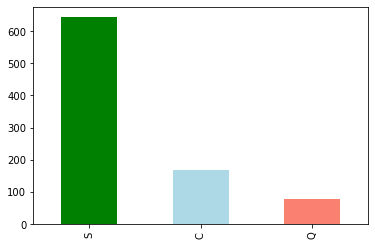

In [34]:
# Embarked column have only 2 missing so replace it with mode()
train_df_tmp.Embarked.value_counts().plot.bar(color=['green', 'lightblue','salmon'])

In [35]:
train_df_tmp.Embarked.fillna(train_df_tmp.Embarked.mode()[0], inplace=True)

In [36]:
train_df_tmp.Embarked.isna().sum()

0

**Note**- Now Cabin has lot of missing values almost more than 50% so we will make nan as new value 

In [37]:
train_df_tmp['Cabin'] = np.where(train_df_tmp["Cabin"].isnull(),"missing", train_df_tmp["Cabin"])

In [38]:
train_df_tmp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_missing
0,0,3,male,22.0,1,0,7.2500,missing,S,False
1,1,1,female,38.0,1,0,71.2833,C85,C,False
2,1,3,female,26.0,0,0,7.9250,missing,S,False
3,1,1,female,35.0,1,0,53.1000,C123,S,False
4,0,3,male,35.0,0,0,8.0500,missing,S,False
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,missing,S,False
887,1,1,female,19.0,0,0,30.0000,B42,S,False
888,0,3,female,28.0,1,2,23.4500,missing,S,True
889,1,1,male,26.0,0,0,30.0000,C148,C,False


## One hot Encoding


In [39]:
dummies= pd.get_dummies(train_df_tmp.Cabin)
dummies

,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,missing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
train_df_encoded = pd.concat([train_df_tmp, dummies], axis= 'columns')
train_df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_missing,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,missing
0,0,3,male,22.0,1,0,7.2500,missing,S,False,...,0,0,0,0,0,0,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,False,...,0,0,0,0,0,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,missing,S,False,...,0,0,0,0,0,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,False,...,0,0,0,0,0,0,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,missing,S,False,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,missing,S,False,...,0,0,0,0,0,0,0,0,0,1
887,1,1,female,19.0,0,0,30.0000,B42,S,False,...,0,0,0,0,0,0,0,0,0,0
888,0,3,female,28.0,1,2,23.4500,missing,S,True,...,0,0,0,0,0,0,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,C148,C,False,...,0,0,0,0,0,0,0,0,0,0


In [41]:
dummies2= pd.get_dummies(train_df_encoded.Embarked, drop_first=True)
train_df_encoded = pd.concat([train_df_encoded, dummies2], axis= 'columns')
train_df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_missing,...,F G73,F2,F33,F38,F4,G6,T,missing,Q,S
0,0,3,male,22.0,1,0,7.2500,missing,S,False,...,0,0,0,0,0,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,False,...,0,0,0,0,0,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,missing,S,False,...,0,0,0,0,0,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,False,...,0,0,0,0,0,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,missing,S,False,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,missing,S,False,...,0,0,0,0,0,0,0,1,0,1
887,1,1,female,19.0,0,0,30.0000,B42,S,False,...,0,0,0,0,0,0,0,0,0,1
888,0,3,female,28.0,1,2,23.4500,missing,S,True,...,0,0,0,0,0,0,0,1,0,1
889,1,1,male,26.0,0,0,30.0000,C148,C,False,...,0,0,0,0,0,0,0,0,0,0


In [42]:
lbe = LabelEncoder()
train_df_encoded.Sex = lbe.fit_transform(train_df_encoded.Sex)
train_df_encoded.Age_missing = lbe.fit_transform(train_df_encoded.Age_missing)

In [43]:
train_df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_missing,...,F G73,F2,F33,F38,F4,G6,T,missing,Q,S
0,0,3,1,22.0,1,0,7.2500,missing,S,0,...,0,0,0,0,0,0,0,1,0,1
1,1,1,0,38.0,1,0,71.2833,C85,C,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,missing,S,0,...,0,0,0,0,0,0,0,1,0,1
3,1,1,0,35.0,1,0,53.1000,C123,S,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,missing,S,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,missing,S,0,...,0,0,0,0,0,0,0,1,0,1
887,1,1,0,19.0,0,0,30.0000,B42,S,0,...,0,0,0,0,0,0,0,0,0,1
888,0,3,0,28.0,1,2,23.4500,missing,S,1,...,0,0,0,0,0,0,0,1,0,1
889,1,1,1,26.0,0,0,30.0000,C148,C,0,...,0,0,0,0,0,0,0,0,0,0


**note**- male=1 female-0

In [44]:
## Drop original cabin beause we have encoded it and also drop one encoded column beause Dummy variable trap
train_df_encoded.drop(['Cabin','missing','Embarked'],axis=1, inplace=True)

In [45]:
train_df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_missing,A10,A14,...,F G63,F G73,F2,F33,F38,F4,G6,T,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,3,0,28.0,1,2,23.4500,1,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,1,1,26.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
## saving preprocessed data
train_df_encoded.to_csv('D:\Machine_learning/MACHINE_LEARN/PROJECTS/Titanic/Data/processed_train.csv')

## Split into train and validation set

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X= train_df_encoded.iloc[:,1:]
y= train_df_encoded.Survived

In [50]:
X.shape, y.shape

((891, 156), (891,))

In [51]:
X.head().T

,0,1,2,3,4
Pclass,3.0,1.0,3.0,1.0,3.0
Sex,1.0,0.0,0.0,0.0,1.0
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1.0,1.0,0.0,1.0,0.0
Parch,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
F4,0.0,0.0,0.0,0.0,0.0
G6,0.0,0.0,0.0,0.0,0.0
T,0.0,0.0,0.0,0.0,0.0
Q,0.0,0.0,0.0,0.0,0.0


In [52]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [53]:
X_train,X_val,y_train, y_val= train_test_split(X,y, test_size=0.3, random_state=1)

In [54]:
X_train.shape, X_val.shape,y_train.shape, y_val.shape

((623, 156), (268, 156), (623,), (268,))

In [55]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Age_missing,A10,A14,A16,...,F G63,F G73,F2,F33,F38,F4,G6,T,Q,S
114,3,0,17.0,0,0,14.4583,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
874,2,0,28.0,1,0,24.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,3,1,28.0,0,0,7.8958,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
876,3,1,20.0,0,0,9.8458,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
674,2,1,28.0,0,0,0.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,1,19.0,0,0,7.6500,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
767,3,0,30.5,0,0,7.7500,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
72,2,1,21.0,0,0,73.5000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
235,3,0,28.0,0,0,7.5500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
X_train.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Age_missing,A10,A14,A16,...,F G63,F G73,F2,F33,F38,F4,G6,T,Q,S
Pclass,1.000000,0.149767,-0.337759,0.066634,-0.002879,-0.583153,0.136674,-0.064689,-0.064689,-0.064689,...,0.032189,0.045559,-0.016250,NaN,0.032189,-0.022999,0.055843,NaN,0.221229,0.110156
Sex,0.149767,1.000000,0.057058,-0.145244,-0.256848,-0.197466,0.027062,0.029314,0.029314,-0.054845,...,0.029314,0.041489,0.029314,NaN,0.029314,-0.018068,-0.095148,NaN,-0.083897,0.136756
Age,-0.337759,0.057058,1.000000,-0.223152,-0.167973,0.104757,-0.063137,0.019135,-0.005003,0.055342,...,0.037239,-0.032704,-0.080435,NaN,-0.005003,-0.115979,-0.055790,NaN,-0.033723,-0.047126
SibSp,0.066634,-0.145244,-0.223152,1.000000,0.419345,0.186377,0.022352,-0.018905,-0.018905,0.019711,...,-0.018905,-0.026757,0.019711,NaN,-0.018905,0.082553,0.011864,NaN,-0.024913,0.067708
Parch,-0.002879,-0.256848,-0.167973,0.419345,1.000000,0.253921,-0.134500,-0.019104,-0.019104,-0.019104,...,-0.019104,-0.027039,0.031977,NaN,-0.019104,0.045259,0.085015,NaN,-0.106817,0.075851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F4,-0.022999,-0.018068,-0.115979,0.082553,0.045259,0.009630,-0.028716,-0.002275,-0.002275,-0.002275,...,-0.002275,-0.003221,-0.002275,NaN,-0.002275,1.000000,-0.003948,NaN,-0.017126,0.033922
G6,0.055843,-0.095148,-0.055790,0.011864,0.085015,-0.024655,-0.035199,-0.002789,-0.002789,-0.002789,...,-0.002789,-0.003948,-0.002789,NaN,-0.002789,-0.003948,1.000000,NaN,-0.020992,0.041580
T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q,0.221229,-0.083897,-0.033723,-0.024913,-0.106817,-0.128948,0.337082,-0.012100,-0.012100,-0.012100,...,-0.012100,-0.017126,-0.012100,NaN,0.132868,-0.017126,-0.020992,NaN,1.000000,-0.504857


#### Plot heatmap

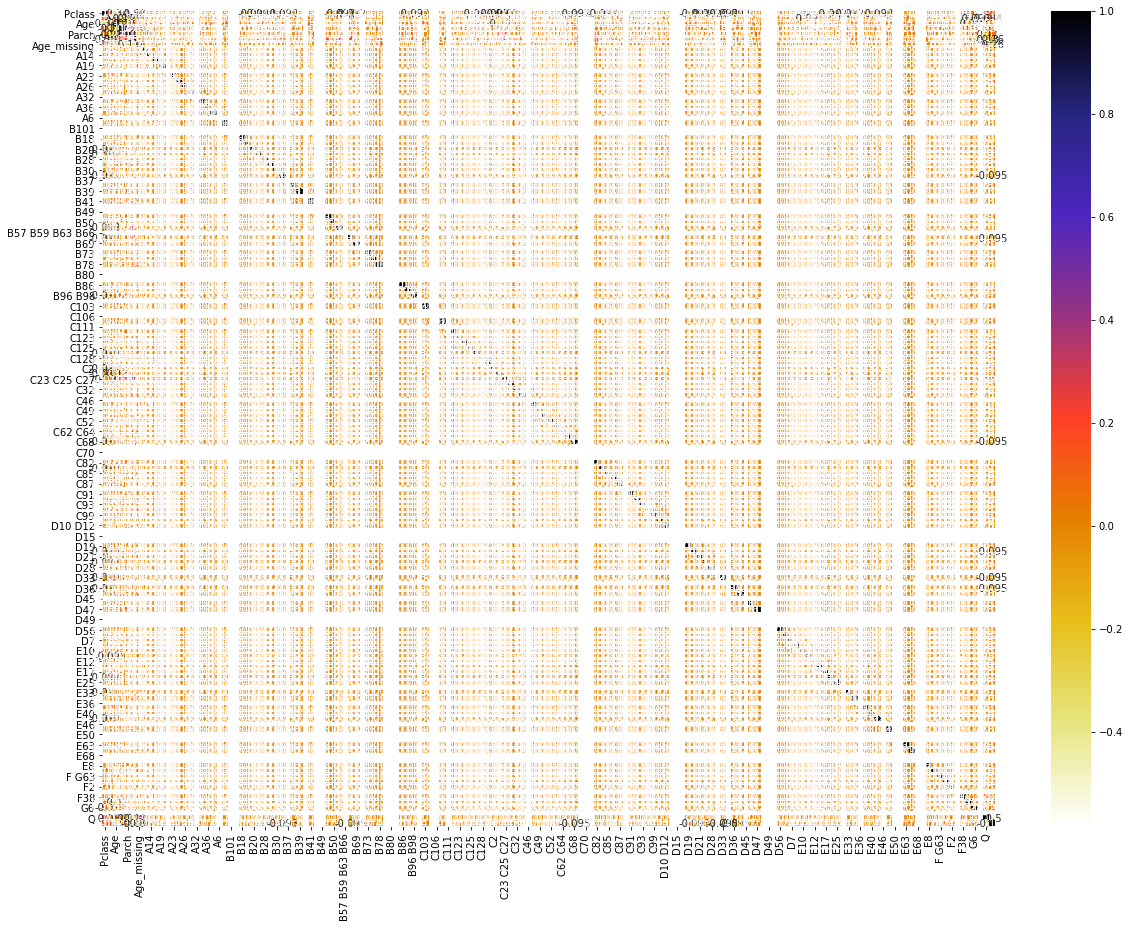

In [72]:
plt.figure(figsize=(20,15))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### This map is not useful so make fuction to get higly correlated feature

In [75]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [80]:
corr_features = correlation(X_train, 0.80)

In [81]:
len(corr_features)

0

##### We do not have any correlaed features more than 80% 

# Build model

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [91]:
models_dict={"random forest": RandomForestClassifier(),
       'GBC': GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()}

In [94]:
def get_scores(model,x_train,x_test,y_train,y_test):
    
    np.random.seed(1)
    
    # make dict for keeping model score
    model_score = {}
    for name, model in model.items():
        model.fit(x_train,y_train)
      
        model_score[name]= model.score(x_test,y_test)
    
    return model_score
    
    

In [97]:
models_scores= get_scores(models_dict,X_train,X_val,y_train,y_val)
models_scores

{'random forest': 0.7835820895522388,
 'GBC': 0.7873134328358209,
 'KNN': 0.7164179104477612}

In [105]:
models_scores= pd.DataFrame(models_scores, index=['accuracy'])
models_scores

,random forest,GBC,KNN
accuracy,0.783582,0.787313,0.716418


<AxesSubplot:>

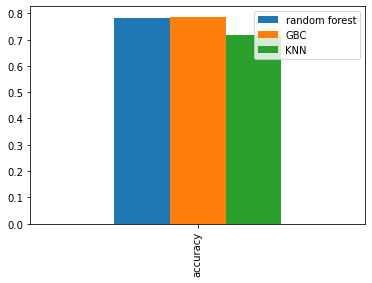

In [106]:
models_scores.plot.bar()

# Hypertuning